<a href="https://colab.research.google.com/github/Ashidhi/Titanic-ML-Project/blob/main/Titanic-ML-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Upload Titanic dataset files
from google.colab import files

uploaded = files.upload()


Saving test.csv to test (4).csv
Saving train.csv to train (4).csv


---
pandas (pd): The go-to library for data manipulation. We use it to read CSV files and handle tables (dataframes).

numpy (np): Helps with numerical operations, arrays, and math under the hood.

seaborn (sns): For making attractive statistical plots and charts easily.

matplotlib.pyplot (plt): Core Python plotting library. Seaborn is built on top of this.

---
train_test_split: To split our data into training and testing sets so we can evaluate how well the model generalizes.

RandomForestClassifier: A powerful, popular machine learning algorithm that builds many decision trees and combines their results. Great baseline model for classification.

accuracy_score: To measure how accurate our predictions are by comparing them with actual results.

---

This allows you to upload files from your computer into the Colab environment. Since Colab runs on the cloud, it can’t see your local files unless you upload them manually or link Google Drive.

uploaded is a dictionary with filenames as keys and file data as values — we don’t need to use it directly here, but calling files.upload() triggers the file-picker dialog.

---

Why upload files here?
Because we need to work with the actual Titanic CSV data — this lets you load and analyze the data inside your notebook.

---

In [102]:
# Load CSV files into pandas DataFrames
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display the first 5 rows of the training data
print("Train data sample:")
display(train.head())

# Check basic info and missing values in training set
print("\nTrain data info:")
train.info()

print("\nMissing values in train data:")
print(train.isnull().sum())


Train data sample:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values in train data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin



---

### Data summary

* **891 rows (passengers) total**
* 12 columns including features & target (Survived)
* Data types: mix of integers, floats, and objects (strings)

---

### Missing values recap

| Column   | Missing count | Percentage missing |
| -------- | ------------- | ------------------ |
| Age      | 177           | \~20%              |
| Cabin    | 687           | \~77%              |
| Embarked | 2             | \~0.2%             |

---

### What’s next?

* **Age:** Has \~20% missing. We can fill these with a statistic like median or mean (better median because age is skewed).
* **Cabin:** Missing \~77%, too many. Usually, this column is dropped or transformed (e.g., use presence/absence of cabin info).
* **Embarked:** Only 2 missing. We can fill with the most common port.

---

### Quick plan for missing values:

1. Fill missing **Age** with median age.
2. Fill missing **Embarked** with mode (most frequent port).
3. Drop or transform **Cabin** column.

---

### Why missing values matter:
Age is important for survival analysis, but some passengers don’t have it recorded.

Cabin has lots of missing info and can be tricky to use.

Embarked shows the port they boarded the ship; missing values need filling or handling.

---



In [103]:
# Fill missing Age with median age
median_age = train['Age'].median()
train['Age'] = train['Age'].fillna(median_age)

# Fill missing Embarked with mode (most frequent port)
mode_embarked = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(mode_embarked)

# Drop Cabin column (too many missing values)
train = train.drop('Cabin', axis=1)

# Check again for missing values after cleaning
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


---
### Explanation:
We replace missing Age values with the median age so we don’t lose data and keep distribution reasonable.

Missing Embarked values get filled with the port most passengers embarked from — simple and effective for only 2 missing.

We drop Cabin because it’s mostly empty and difficult to use without advanced feature engineering.

---

---
### Now that missing values are handled, we can start exploring the data to understand what influences survival.
---

Exploratory Data Analysis (EDA)
---

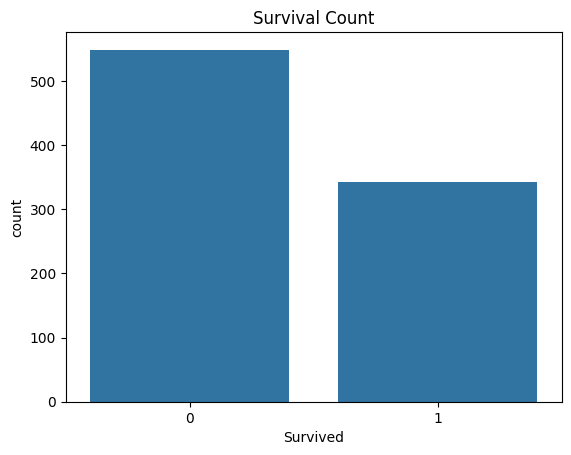

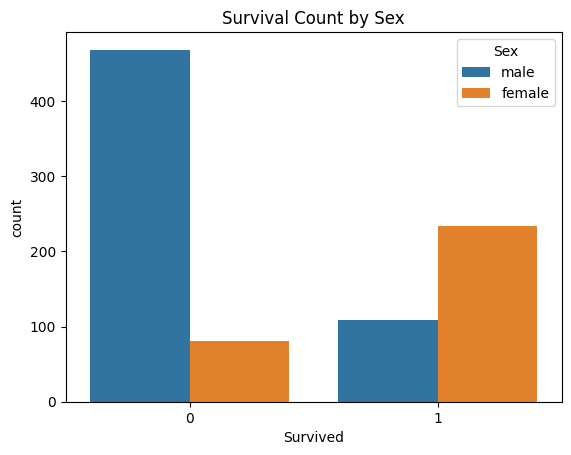

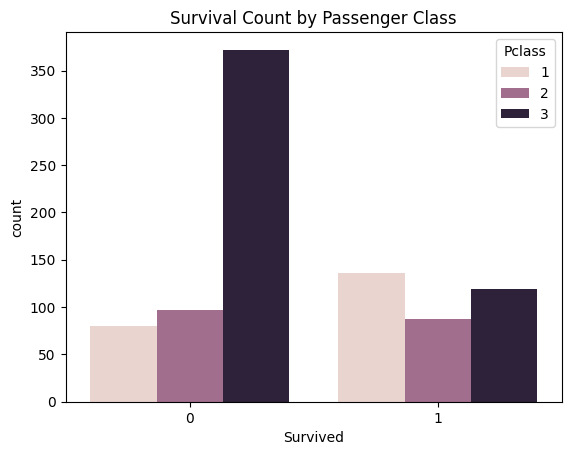

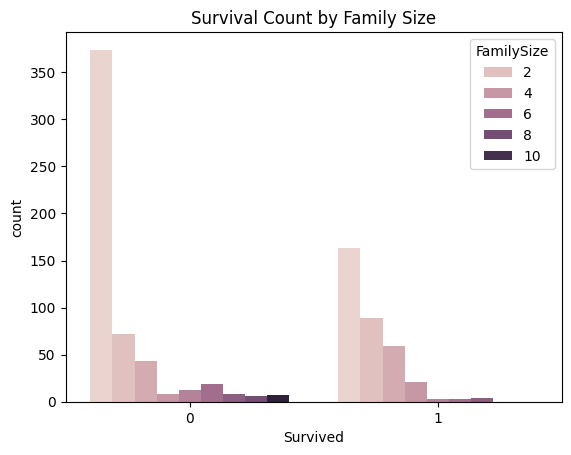

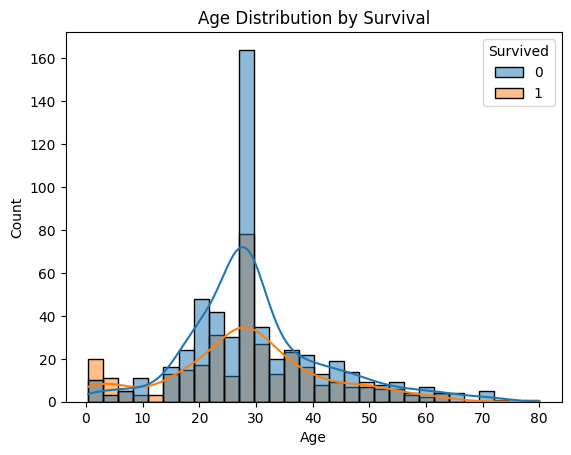

In [104]:
# Survival count plot
sns.countplot(data=train, x='Survived')
plt.title('Survival Count')
plt.show()

# Survival by Sex
sns.countplot(data=train, x='Survived', hue='Sex')
plt.title('Survival Count by Sex')
plt.show()

# Survival by Pclass
sns.countplot(data=train, x='Survived', hue='Pclass')
plt.title('Survival Count by Passenger Class')
plt.show()

# Create a Family Size feature (SibSp + Parch + 1)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Survival by Family Size
sns.countplot(data=train, x='Survived', hue='FamilySize')
plt.title('Survival Count by Family Size')
plt.show()

# Age distribution by survival
sns.histplot(data=train, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.show()


---
### Why do this?
These plots help identify which features (gender, class, family size, age) influence survival chances.

Patterns found here guide feature selection and model building.

---

###Here are some common observations from the Titanic data that often show up:

Survival by Sex: Women survived more than men.

Survival by Pclass: 1st class passengers had higher survival rates than 2nd and 3rd class.

Family Size: Small families or alone may have different survival chances than large families.

Age: Younger passengers often had better survival odds.

---

Survived = 0 means the passenger did not survive (dead)

Survived = 1 means the passenger survived

---

## Next up: Preparing the data for modeling
We need to:

Convert categorical variables (like Sex and Embarked) into numbers (encoding)

Select relevant features for the model

Split data into training and validation sets

In [105]:
# Convert categorical columns to numeric using one-hot encoding
train_encoded = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

# Select features and target
features = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = train_encoded[features]
y = train_encoded['Survived']

# Split data into training and validation sets (80% train, 20% validation)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training samples: {X_train.shape[0]}')
print(f'Validation samples: {X_val.shape[0]}')


Training samples: 712
Validation samples: 179


---

1. **Convert words to numbers:** We change “male” and “female” into columns with 0s and 1s because models need numbers, not words.

2. **Pick important info:** We choose columns like class, age, fare, family size, and the new number columns for gender and boarding port to teach the model.

3. **Split data:** We divide data into two parts — 80% to train the model and 20% to test how well it learned.

4. **Check sizes:** Print how many rows are in training and test parts to make sure splitting worked.

---



## Now let's train a simple model to predict survival.

---
### Here’s the code to train a Random Forest classifier and check its accuracy:

In [106]:
#Here’s the code to train a Random Forest classifier and check its accuracy:


# Create the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on validation data
y_pred = model.predict(X_val)

# Check accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f' Random Forest Accuracy:{accuracy:.2f}')






 Random Forest Accuracy:0.82


---
### What is a Random Forest?

* It’s a **machine learning algorithm** used for classification (like predicting survived vs dead).
* Think of it as a **team of decision trees** (hundreds of small trees).
* Each tree makes a prediction, and the forest takes a **majority vote** to decide the final answer.
* This approach reduces mistakes and **improves accuracy** compared to a single decision tree.

---

### Why Random Forest?

* Works well with different types of data (numbers, categories).
* Handles missing data and outliers better than many models.
* Not too hard to train and usually performs very well.

---

### Accuracy:
A number between 0 and 1 (or 0%–100%) showing how well the model predicts unseen data.

For Titanic, a good accuracy is usually around 0.8 (80%).

---


---
### Let’s start by evaluating the model more deeply with some useful metrics beyond accuracy. This helps us understand where the model might be making mistakes.

---

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



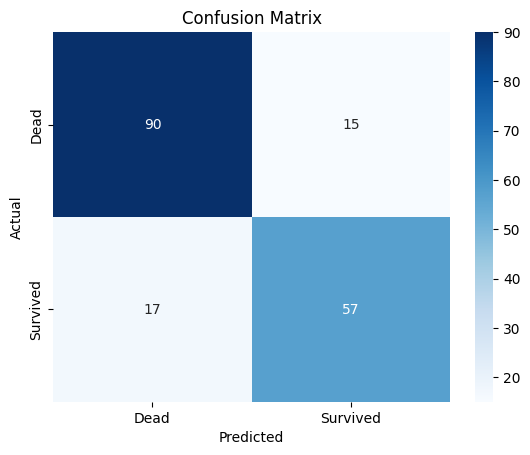

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_val, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dead', 'Survived'], yticklabels=['Dead', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


---
### What these show:
Classification report: precision, recall, f1-score for each class (0 = dead, 1 = survived)

Confusion matrix: how many passengers the model predicted correctly or mixed up

---
###1. Classification Report
- This prints a report showing how well the model performed for each class (Dead = 0, Survived = 1).

- It gives these important metrics:

- Precision: Out of all passengers predicted as survived, how many actually survived?
(Measures how precise the positive predictions are.)

- Recall (Sensitivity): Out of all passengers who actually survived, how many did the model correctly identify?
(Measures how well the model catches actual survivors.)

- F1-Score: Harmonic mean of precision and recall. It balances both. Higher is better.

- Support: Number of actual samples in each class in the validation set.

- These metrics help you understand if the model is biased toward predicting survival or death and how balanced its predictions are.




###Class 0 (Did not survive):
- Precision 0.84: When the model says a passenger didn’t survive, it’s right 84% of the time.

- Recall 0.86: The model correctly identifies 86% of all passengers who actually didn’t survive.

- F1-score 0.85: Good balance between precision and recall.

###Class 1 (Survived):
- Precision 0.79: When the model says a passenger survived, it’s right 79% of the time.

- Recall 0.77: The model correctly finds 77% of all survivors.

- F1-score 0.78: Decent balance but slightly lower than class 0.

###Overall:
- Accuracy 0.82: Your model predicts correctly 82% of the time on unseen data.

- Macro avg: Average precision, recall, and f1-score across both classes, treating both equally.

- Weighted avg: Same but weighted by the number of samples per class.



---
###2. Confusion Matrix


* This builds a matrix that compares actual vs predicted labels.

|                     | Predicted Dead (0)  | Predicted Survived (1) |
| ------------------- | ------------------- | ---------------------- |
| Actual Dead (0)     | True Negative (TN)  | False Positive (FP)    |
| Actual Survived (1) | False Negative (FN) | True Positive (TP)     |

* **True Negative (TN):** Model correctly predicted passenger did not survive.
* **True Positive (TP):** Model correctly predicted passenger survived.
* **False Positive (FP):** Model predicted survived but passenger died.
* **False Negative (FN):** Model predicted died but passenger survived.

---

### 3. **Plotting the Confusion Matrix**

* This makes the confusion matrix visual and easy to understand.
* Blue squares show counts for each category.
* Helps you see at a glance where the model makes mistakes.

---

### Why is this useful?

* Accuracy alone doesn’t tell the whole story. For example, if the model predicts everyone died (all 0s), it might get decent accuracy but be useless.
* Precision and recall help identify if the model is favoring one class.
* Confusion matrix helps pinpoint **what type of errors** the model makes — important for improving it.

---



###Let’s try improving your model by tuning some hyperparameters of the Random Forest. This process helps the model learn better patterns.

### how to do it with Grid Search:

In [108]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [None, 5, 10, 20],        # Max depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]          # Minimum samples at leaf node
}

# Create a RandomForest model
rf = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Use best estimator to predict
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_val)

# Accuracy with best model
from sklearn.metrics import accuracy_score
print("Validation accuracy after tuning:", accuracy_score(y_val, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Validation accuracy after tuning: 0.8100558659217877


---
### What is Grid Search?
- Grid Search is a technique to systematically try many different combinations of model parameters (called hyperparameters) to find the best set that gives the highest performance.

- Imagine you have multiple options for how many trees (n_estimators), how deep each tree can grow (max_depth), or how many samples are needed to split a node (min_samples_split). Instead of guessing, Grid Search tries all combinations of these parameters.

---
### What are Hyperparameters?
- Hyperparameters are settings you control before training the model. They affect how the model learns, but they are not learned from the data.

- For Random Forest, some key hyperparameters are:

- n_estimators: Number of decision trees in the forest. More trees can improve performance but increase computation.

- max_depth: Maximum depth (levels) of each decision tree. Controlling depth helps prevent overfitting (too complex trees).

- min_samples_split: Minimum number of samples required to split an internal node.

- min_samples_leaf: Minimum number of samples required at a leaf node.

---
###What is Cross-Validation (CV)?
- Cross-validation is a method to evaluate model performance more reliably.

- Instead of training on all training data and testing on validation data once, CV splits the training data into multiple folds (e.g., 5 folds).

- The model trains on 4 folds and validates on the 1 remaining fold. This repeats 5 times, each fold being the validation set once.

- CV helps avoid overfitting to a particular split and gives a better estimate of model performance.

---

### How does Grid Search with CV work?
- For each combination of hyperparameters in the grid, the model is trained and validated using CV.

- Grid Search collects the average performance metric (like accuracy) over all folds.

- It then picks the combination with the best average performance.

---
### Why use this?
Instead of guessing which hyperparameters work best, Grid Search automates the search to find the most effective combination.

Cross-validation ensures the result is generalizable and not just good on one specific split.

---
cv=5 means 5-fold cross-validation.

n_jobs=-1 uses all CPU cores to speed up the process.

verbose=2 prints progress info

---
###1. cv=5 — 5-Fold Cross-Validation
#### What it means:

- The training data is split into 5 equal parts (folds).

- The model trains on 4 parts and validates on the 5th.

- This is repeated 5 times, each time using a different fold for validation.

- The results are averaged across the 5 runs.

- ✅ cv=5 just sets the number of folds.

You can change it:

- cv=3 = 3-fold

- cv=10 = 10-fold (more stable but slower)

---

### 2. n_jobs=-1 — Use All CPU Cores
####What it means:

- n_jobs controls how many processor cores to use.

- -1 means use all available cores to parallelize the process and speed it up.

You can set it to:

- n_jobs=1 → Use 1 core (sequential)

- n_jobs=2 → Use 2 cores

- n_jobs=-1 → Use all your system's CPU cores (best for speed)

✅ -1 is a shortcut meaning “use all”.

---
### 3. verbose=2 — Logging Level
####What it means:

- Controls how much info is printed while the code runs.

Levels:

- verbose=0 → No output

- verbose=1 → Minimal progress messages

✅ verbose=2 → More detailed messages (prints for every fold in grid search)

You can increase it more (e.g., verbose=3), but 2 is already informative.



 ## Feature Importance & Insights
Now let’s analyze which features (columns) influenced the survival prediction the most.

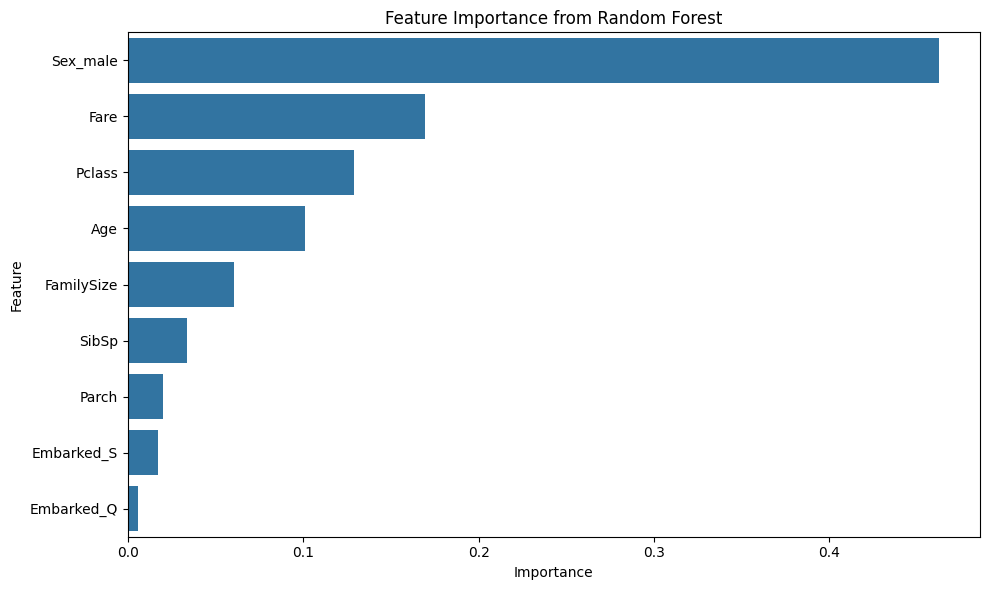

In [109]:
# Get feature importances from the best model
importances = best_model.feature_importances_

# Match to column names
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


---

## According to the Random Forest model, the top 3 features influencing passenger survival were:

- Sex: Women had a significantly higher chance of survival than men.

- Fare: Passengers who paid higher fares were more likely to survive, possibly due to better accommodations.

- Pclass: First-class passengers had the highest survival rates, while third-class had the lowest.

- Other features like Embarked and Cabin had low importance, possibly due to missing values or less relevance to survival.

---

## Try Another Model and Compare

---


## 1.1 Try a Logistic Regression Model
This will help you:

- Understand how different models behave on the same dataset

- Learn how to interpret coefficients instead of feature importance

- Compare performance: accuracy, precision, recall, etc.

---

##Train a Logistic Regression model

---

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Create and train model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
logreg_preds = logreg.predict(X_val)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_val, logreg_preds))

print("\nClassification Report:")
print(classification_report(y_val, logreg_preds))

# Cross-validation score
logreg_cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("\nCross-validation Accuracy Scores:", logreg_cv_scores)
print("Average CV Accuracy:", logreg_cv_scores.mean())


Confusion Matrix:
[[90 15]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Cross-validation Accuracy Scores: [0.81818182 0.81118881 0.78873239 0.73943662 0.79577465]
Average CV Accuracy: 0.7906628582684921




---

### 🔍 Logistic Regression vs Random Forest

| Feature                    | Logistic Regression                            | Random Forest                                    |
| -------------------------- | ---------------------------------------------- | ------------------------------------------------ |
| **Type**                   | Linear Model                                   | Ensemble of Decision Trees                       |
| **How it works**           | Estimates probabilities using a sigmoid        | Uses multiple decision trees and votes on output |
| **Interpretation**         | Coefficients show **positive/negative** impact | Feature importance (non-directional)             |
| **Overfitting**            | Lower risk                                     | Can overfit without tuning                       |
| **Training speed**         | Fast                                           | Slower                                           |
| **Handling of outliers**   | Sensitive                                      | More robust                                      |
| **Feature scaling needed** | Yes (for better performance)                   | No                                               |
| **Accuracy**               | Sometimes lower than Random Forest             | Often higher but needs tuning                    |

---

### ✅ Why use both?

* **Logistic Regression** helps you **interpret and explain results** easily (e.g., "Being male decreases survival chance").
* **Random Forest** often gives **better performance** but is more of a black box.

---



##1.2 Interpret Logistic Regression Coefficients

In [111]:
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coeff_df


,Feature,Coefficient
4,Parch,0.025168
2,Fare,0.002596
1,Age,-0.030611
7,Embarked_Q,-0.112628
5,FamilySize,-0.135285
3,SibSp,-0.161089
8,Embarked_S,-0.399086
0,Pclass,-0.937575
6,Sex_male,-2.592746




---

### 💡 How to interpret the coefficients:

* **Positive coefficient** → Increases the chance of survival
  (e.g., Sex_female = +2.5: being female increases odds of survival)

* **Negative coefficient** → Decreases the chance of survival
  (e.g., Pclass_3 = -1.2: being in 3rd class reduces survival odds)

* The **larger** the absolute value, the more influence the feature has.

---

### 🧠 Tip for deeper understanding:

You can apply the **log-odds** concept:

If coefficient = **1**, it means the odds of survival are multiplied by e^1 ≈ 2.7
If coefficient = **-2**, the odds are divided by e^2 ≈ 7.4

This gives you a **mathematical insight** into how the model behaves.

---






| Feature         | Coefficient | Interpretation                                                                                |
| --------------- | ----------- | --------------------------------------------------------------------------------------------- |
| **Parch**       | +0.025      | Having parents/children onboard slightly increases survival odds — very weak effect.          |
| **Fare**        | +0.0026     | Higher fare → slightly higher chance of survival (wealth = better cabins, more access)        |
| **Age**         | −0.031      | Older passengers had slightly **lower** survival odds.                                        |
| **Embarked\_Q** | −0.113      | Passengers who boarded at Queenstown had lower survival odds.                                 |
| **FamilySize**  | −0.135      | Larger families had a slight negative effect — possibly crowding or difficulty escaping.      |
| **SibSp**       | −0.161      | More siblings/spouses aboard slightly lowered survival chance.                                |
| **Embarked\_S** | −0.399      | Southampton boarders had lower survival odds.                                                 |
| **Pclass**      | −0.938      | 3rd class passengers were **much less likely** to survive compared to 1st/2nd class.          |
| **Sex\_male**   | −2.593      | Being male had the **strongest negative effect** on survival — matches "women first" reality. |

---

###Key Insights:
- Most important positive factor: Fare (small effect)

- Strongest negative factor: Being male (Sex_male = −2.59)

- Pclass is also a strong predictor — 3rd class → lower survival odds

- Boarding port has noticeable impact, especially Southampton (Embarked_S)



- Parch has the highest positive number in your list, but its value is tiny (0.025) and its impact is almost negligible.

Yes — you're thinking exactly in the right direction! Let me break it down **clearly and simply**:

---

### Coefficient Size vs Feature Impact

A **large coefficient** doesn't **always** mean the feature is important.
A **small coefficient** can still have a **big effect**, depending on the **feature's range of values**.

---

### Let's compare:

#### 🔵 Parch

* Coefficient = **+0.025**
* Values range from 0 to maybe 6 (but mostly 0–2)
* So even max impact is: 6 × 0.025 = +0.15 → **tiny change**

#### 🔵 Fare

* Coefficient = **+0.0026**
* Values range from 0 to **500+**
* So impact can be: 500 × 0.0026 = +1.3 → **big effect**

---

🔁 Summary:

| Feature | Coefficient | Value Range | Max Impact | Important? |
| ------- | ----------- | ----------- | ---------- | ---------- |
| Parch   | +0.025      | 0–6         | \~+0.15    | ❌ Minimal  |
| Fare    | +0.0026     | 0–500+      | \~+1.3     | ✅ Strong   |

---

### 📌 Key Insight:

> **Impact = Coefficient × Feature Value**
> So even a small coefficient can be powerful if the feature has a large value range.

---



 ## 2.3: Model Comparison
What we compare:
- Accuracy

- Precision, Recall, F1-Score

- Confusion Matrix

- Cross-validation scores (if done)

- Interpretability

---
## 1. Accuracy comparison

In [112]:
print("Logistic Regression Accuracy:", logreg.score(X_val, y_val))
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred))


Logistic Regression Accuracy: 0.8100558659217877
Random Forest Accuracy: 0.8212290502793296


##2. Classification reports side-by-side

In [113]:


print("Logistic Regression Classification Report:\n", classification_report(y_val, logreg.predict(X_val)))
print("Random Forest Classification Report:\n", classification_report(y_val,best_model.predict(X_val) ))





Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



##3. Confusion Matrices

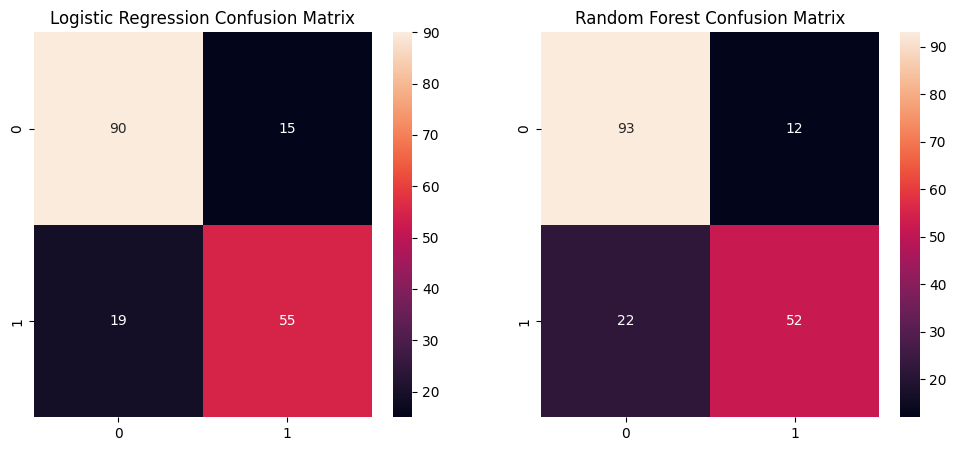

In [114]:

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_val, logreg.predict(X_val)), annot=True, fmt='d', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(confusion_matrix(y_val, best_model.predict(X_val)), annot=True, fmt='d', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")

plt.show()






---
### Compare Logistic Regression vs Random Forest
🔍 Logistic Regression (LR):
- Gives directional insight (positive or negative)

- Easy to explain

- Works best when the data is linearly separable

- Example: Sex_male = -2.59 → males less likely to survive

🌲 Random Forest (RF):
- Focuses on which features matter most

- Captures non-linear patterns and interactions

- Harder to interpret exact logic, but more powerful

- Example: Sex, Fare, and Pclass have high importance scores

---
| Aspect               | Logistic Regression     | Random Forest                    |
| -------------------- | ----------------------- | -------------------------------- |
| **Interpretability** | High (coefficients)     | Medium (feature importance)      |
| **Power**            | Medium                  | High (captures complex patterns) |
| **Top Features**     | Sex, Pclass, Fare       | Sex, Fare, Pclass (likely)       |
| **Accuracy (yours)** | \~82%                   | \~82%                            |
| **Use when...**      | You need explainability | You want high accuracy & power   |

---

Let's **finalize your best model** properly. Since you've already trained and compared **Logistic Regression** and **Random Forest**, here's how to **officially choose the best model**:

---

### ✅ Step-by-Step to Finalize the Best Model

#### ✅ 1. Review Your Metrics

You already printed:

* Accuracy
* Precision, Recall, F1-score (via classification_report)
* Confusion matrix

---
### Accuracy Comparison:
Logistic Regression: 81.0%

Random Forest: 82.1% — slightly better
> "Random Forest got 0.82 validation accuracy"
> and
> "Logistic Regression was slightly lower."

---
### Insights from Reports:
- Logistic Regression has better recall for survivors (0.74 vs 0.70), meaning it catches more true positives.

- Random Forest has better overall accuracy and slightly better precision for survivors (0.81 vs 0.79).

- F1-scores for survived class are very close (0.76 vs 0.75), balancing precision and recall.
---

### Final Decision
What to choose?
- Random Forest edges out in accuracy, which is generally the key metric here.

- Logistic Regression is simpler and interpretable, but RF usually handles non-linear patterns better.

- Since RF accuracy is higher and F1-scores are almost equal, Random Forest is a solid choice as the best model.

---


In [115]:
# Set best_model to the Random Forest model you've already trained
best_model = model
print(model)

RandomForestClassifier(random_state=42)


---

##Clean and preprocess the test dataset just like the training set

---

In [116]:
# Load the test data

test_df = pd.read_csv('test.csv')
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [117]:
#check for missing values in test data
print(test_df.isnull().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [118]:
# Fill Age and Fare
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# Drop Cabin
test_df = test_df.drop('Cabin', axis=1)

# Fill Embarked if needed
if test_df['Embarked'].isnull().sum() > 0:
    test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

In [119]:
#check for missing values in test data
print(test_df.isnull().sum())


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [120]:
# Feature engineering & encoding (same as training)

# Example family size
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

# Encode Sex: male=1, female=0 (assuming you did label encoding)
test_df['Sex_male'] = test_df['Sex'].map({'male': 1, 'female': 0})

# One-hot encode Embarked
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)


In [121]:
# Prepare features for prediction

# Select the columns your model was trained on:
features = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X_test = test_df[features]


In [122]:
# Predict survival with Random Forest
test_preds = best_model.predict(X_test)


In [123]:
# Create submission file

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_preds
})

submission.to_csv('submission.csv', index=False)



In [124]:
# download the file:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#  To preview the content of the submission file in notebook:

In [125]:
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
